# 观察数据分布情况

In [33]:
import pandas as pd

In [65]:
data = pd.read_csv('./exp3-reviews.csv', sep='\t')

In [66]:
import pandas as pd

correlation = data['overall'].corr(data['unixReviewTime'])

print("相关系数:", correlation)


相关系数: 0.03777825386656644


In [35]:
data

,overall,reviewerID,asin,unixReviewTime,summary,reviewText
0,5.0,ALQ4USPEQ9L5N,B0017686ZC,1229126400,Works well for animals that chew wires....,"Last year, I rescued a half-dead stray kitten ..."
1,4.0,ANCVB1IFJR04Q,B0030HMQTS,1396224000,Great brushes,Love these little guys. Haven't really tried S...
2,3.0,A1L8GGJWWQSW4W,B0006IHDQ0,1388016000,Could be better,I like it. I wear it if I can't decide what I ...
3,5.0,A1L06QR691GO4,B007UO79GC,1363478400,Excellent makeup,Excellent makeup ... really had wanted to buy ...
4,4.0,ASAUDLHZPWWVS,B00C8YCFU4,1402358400,nice product!,"It smells like, well, mud but don't let that d..."
...,...,...,...,...,...,...
219995,5.0,A89UT0T57APNZ,1401937586,1348358400,"High quality, trustworthy, dynamic material",I had the privilege of reviewing Eldon Taylor'...
219996,5.0,A3J9HAW1P9W3HL,0143122010,1391644800,Proof that we are becoming better people,This psychologist has illustrated with numerou...
219997,5.0,A2MW2UJLOWFMVN,1616366575,1402790400,Rolheiser is always wise and readable,"This is a short and easy to read book, suited ..."
219998,3.0,A2V7SM4JHO8I72,1605295493,1352419200,Not good for extremely out-of-shape people or ...,I actually don't have a problem with the Kindl...


In [36]:
# 检查DataFrame中是否有缺失值
data.isna().any().any()

True

In [37]:
# 去除包含缺失值的行
data = data.dropna()

In [38]:
data

,overall,reviewerID,asin,unixReviewTime,summary,reviewText
0,5.0,ALQ4USPEQ9L5N,B0017686ZC,1229126400,Works well for animals that chew wires....,"Last year, I rescued a half-dead stray kitten ..."
1,4.0,ANCVB1IFJR04Q,B0030HMQTS,1396224000,Great brushes,Love these little guys. Haven't really tried S...
2,3.0,A1L8GGJWWQSW4W,B0006IHDQ0,1388016000,Could be better,I like it. I wear it if I can't decide what I ...
3,5.0,A1L06QR691GO4,B007UO79GC,1363478400,Excellent makeup,Excellent makeup ... really had wanted to buy ...
4,4.0,ASAUDLHZPWWVS,B00C8YCFU4,1402358400,nice product!,"It smells like, well, mud but don't let that d..."
...,...,...,...,...,...,...
219995,5.0,A89UT0T57APNZ,1401937586,1348358400,"High quality, trustworthy, dynamic material",I had the privilege of reviewing Eldon Taylor'...
219996,5.0,A3J9HAW1P9W3HL,0143122010,1391644800,Proof that we are becoming better people,This psychologist has illustrated with numerou...
219997,5.0,A2MW2UJLOWFMVN,1616366575,1402790400,Rolheiser is always wise and readable,"This is a short and easy to read book, suited ..."
219998,3.0,A2V7SM4JHO8I72,1605295493,1352419200,Not good for extremely out-of-shape people or ...,I actually don't have a problem with the Kindl...


In [39]:
data['reviewerID'].nunique()

125391

In [40]:
data['asin'].nunique()

111697

In [41]:
data['unixReviewTime'].nunique()

5499

In [68]:
import pandas as pd
from scipy.stats import chi2_contingency


# 构建列联表
observed = pd.crosstab(data['overall'], data['unixReviewTime'])

# 执行卡方检验
chi2, p, dof, expected = chi2_contingency(observed)

# 输出结果
print("卡方统计量:", chi2)
print("p 值:", p)
print("自由度:", dof)
print("期望频数:", expected)

# 判断是否独立
alpha = 0.05
if p < alpha:
    print("拒绝原假设，两列不独立")
else:
    print("接受原假设，两列独立")


卡方统计量: 24927.03785429603
p 值: 2.316727631777291e-41
自由度: 21992
期望频数: [[4.60636364e-02 4.60636364e-02 4.60636364e-02 ... 5.11306364e+00
  4.42210909e+00 7.83081818e-01]
 [4.62181818e-02 4.62181818e-02 4.62181818e-02 ... 5.13021818e+00
  4.43694545e+00 7.85709091e-01]
 [9.98181818e-02 9.98181818e-02 9.98181818e-02 ... 1.10798182e+01
  9.58254545e+00 1.69690909e+00]
 [2.21236364e-01 2.21236364e-01 2.21236364e-01 ... 2.45572364e+01
  2.12386909e+01 3.76101818e+00]
 [5.86663636e-01 5.86663636e-01 5.86663636e-01 ... 6.51196636e+01
  5.63197091e+01 9.97328182e+00]]
拒绝原假设，两列不独立


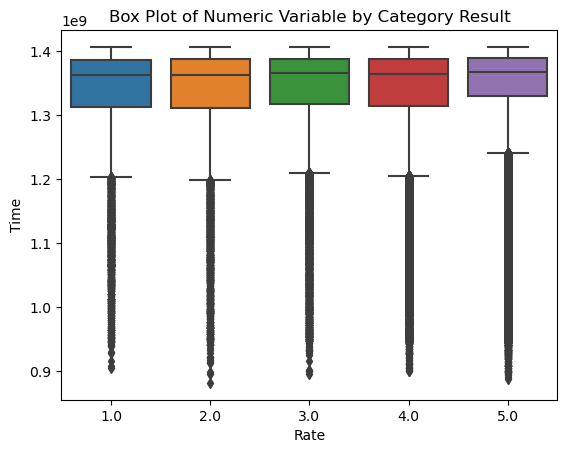

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设你的数据是一个DataFrame，其中包含数值型变量和分类结果
# 例如，假设数值型变量为 'numeric_variable'，分类结果为 'category_result'

# 使用Seaborn绘制箱线图
sns.boxplot(x='overall', y='unixReviewTime', data=data)

# 添加可选的标题和标签
plt.title('Box Plot of Numeric Variable by Category Result')
plt.xlabel('Rate')
plt.ylabel('Time')

# 显示图形
plt.show()


# 特征转换

## 处理ID，asin和时间戳

In [44]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 初始化MinMaxScaler
scaler = MinMaxScaler()

# 对DataFrame的一列进行最大最小值归一化处理
data['unixReviewTime'] = scaler.fit_transform(data[['unixReviewTime']])

/var/folders/2d/mn8kcrjx7v1_v0c3lfyv2j1c0000gn/T/ipykernel_6015/3203153753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unixReviewTime'] = scaler.fit_transform(data[['unixReviewTime']])


In [45]:
data

,overall,reviewerID,asin,unixReviewTime,summary,reviewText
0,5.0,ALQ4USPEQ9L5N,B0017686ZC,0.662825,Works well for animals that chew wires....,"Last year, I rescued a half-dead stray kitten ..."
1,4.0,ANCVB1IFJR04Q,B0030HMQTS,0.981231,Great brushes,Love these little guys. Haven't really tried S...
2,3.0,A1L8GGJWWQSW4W,B0006IHDQ0,0.965591,Could be better,I like it. I wear it if I can't decide what I ...
3,5.0,A1L06QR691GO4,B007UO79GC,0.918834,Excellent makeup,Excellent makeup ... really had wanted to buy ...
4,4.0,ASAUDLHZPWWVS,B00C8YCFU4,0.992921,nice product!,"It smells like, well, mud but don't let that d..."
...,...,...,...,...,...,...
219995,5.0,A89UT0T57APNZ,1401937586,0.890023,"High quality, trustworthy, dynamic material",I had the privilege of reviewing Eldon Taylor'...
219996,5.0,A3J9HAW1P9W3HL,0143122010,0.972506,Proof that we are becoming better people,This psychologist has illustrated with numerou...
219997,5.0,A2MW2UJLOWFMVN,1616366575,0.993744,Rolheiser is always wise and readable,"This is a short and easy to read book, suited ..."
219998,3.0,A2V7SM4JHO8I72,1605295493,0.897761,Not good for extremely out-of-shape people or ...,I actually don't have a problem with the Kindl...


In [46]:
import pandas as pd
import numpy as np

def binary_encode_and_concat(df, column):
    # 二进制编码函数
    def binary_encode(df, column):
        # 复制原始数据，避免修改原始数据
        df_copy = df.copy()

        # 整数编码
        df_copy[column + '_encoded'] = df_copy[column].astype('category').cat.codes

        # 获取最大编码值，并强制转换为标准整数类型
        max_val = int(df_copy[column + '_encoded'].max())

        # 计算所需的二进制位数
        num_bits = max_val.bit_length()

        # 转换为二进制并填充成固定长度
        df_copy[column + '_binary'] = df_copy[column + '_encoded'].apply(lambda x: format(x, '0' + str(num_bits) + 'b'))

        return df_copy

    # 将二进制编码转换为特征向量
    def binary_to_vector(binary_code):
        return [int(bit) for bit in binary_code]

    # 将二进制编码列转换为特征向量
    def binary_columns_to_vectors(df, column):
        vectors = df[column].apply(binary_to_vector)
        return np.array(vectors.tolist())

    # 获取所有特征向量组成的列表
    def get_feature_vector_list(df, column_prefix):
        feature_vectors = []
        for column in df.columns:
            if column.startswith(column_prefix):
                vectors = binary_columns_to_vectors(df, column)
                feature_vectors.append(vectors)
        return np.concatenate(feature_vectors, axis=1).tolist()

    # 进行二进制编码
    df_encoded = binary_encode(df, column)

    # 获取特征向量列表
    feature_vector_list = get_feature_vector_list(df_encoded, column + '_binary')

    # 将特征向量列表作为DataFrame的元素，并使用新的列名
    df_final = df.copy()  # 复制原始数据，避免修改原始数据
    df_final[column] = feature_vector_list

    return df_final


In [47]:
data = binary_encode_and_concat(data, 'reviewerID')

In [48]:
data

,overall,reviewerID,asin,unixReviewTime,summary,reviewText
0,5.0,"[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",B0017686ZC,0.662825,Works well for animals that chew wires....,"Last year, I rescued a half-dead stray kitten ..."
1,4.0,"[1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, ...",B0030HMQTS,0.981231,Great brushes,Love these little guys. Haven't really tried S...
2,3.0,"[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, ...",B0006IHDQ0,0.965591,Could be better,I like it. I wear it if I can't decide what I ...
3,5.0,"[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, ...",B007UO79GC,0.918834,Excellent makeup,Excellent makeup ... really had wanted to buy ...
4,4.0,"[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, ...",B00C8YCFU4,0.992921,nice product!,"It smells like, well, mud but don't let that d..."
...,...,...,...,...,...,...
219995,5.0,"[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, ...",1401937586,0.890023,"High quality, trustworthy, dynamic material",I had the privilege of reviewing Eldon Taylor'...
219996,5.0,"[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, ...",0143122010,0.972506,Proof that we are becoming better people,This psychologist has illustrated with numerou...
219997,5.0,"[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, ...",1616366575,0.993744,Rolheiser is always wise and readable,"This is a short and easy to read book, suited ..."
219998,3.0,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, ...",1605295493,0.897761,Not good for extremely out-of-shape people or ...,I actually don't have a problem with the Kindl...


In [49]:
data = binary_encode_and_concat(data, 'asin')

In [50]:
data

,overall,reviewerID,asin,unixReviewTime,summary,reviewText
0,5.0,"[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...","[0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, ...",0.662825,Works well for animals that chew wires....,"Last year, I rescued a half-dead stray kitten ..."
1,4.0,"[1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...",0.981231,Great brushes,Love these little guys. Haven't really tried S...
2,3.0,"[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, ...","[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...",0.965591,Could be better,I like it. I wear it if I can't decide what I ...
3,5.0,"[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, ...",0.918834,Excellent makeup,Excellent makeup ... really had wanted to buy ...
4,4.0,"[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, ...","[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, ...",0.992921,nice product!,"It smells like, well, mud but don't let that d..."
...,...,...,...,...,...,...
219995,5.0,"[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, ...",0.890023,"High quality, trustworthy, dynamic material",I had the privilege of reviewing Eldon Taylor'...
219996,5.0,"[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.972506,Proof that we are becoming better people,This psychologist has illustrated with numerou...
219997,5.0,"[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, ...","[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, ...",0.993744,Rolheiser is always wise and readable,"This is a short and easy to read book, suited ..."
219998,3.0,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, ...",0.897761,Not good for extremely out-of-shape people or ...,I actually don't have a problem with the Kindl...


## 处理语句

In [51]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# 下载NLTK所需的数据
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 初始化词干提取器和词性还原器
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# 去除标点
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# 分词
def tokenize(text):
    return nltk.word_tokenize(text)

# 去除停用词
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token.lower() not in stop_words]

# 提取词干
def stem(tokens):
    return [stemmer.stem(token) for token in tokens]

# 词性还原
def lemmatize(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]


[nltk_data] Downloading package punkt to /Users/tian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
summary_list = data['summary'].tolist()
reviewText_list = data['reviewText'].tolist()

In [53]:
def PreProcess(text):
    # 去除标点
    text = remove_punctuation(text)
    # 分词
    tokens = tokenize(text)
    # 去除停用词
    tokens = remove_stopwords(tokens)
    # 提取词干
    stemmed_tokens = stem(tokens)
    # 词性还原
    lemmatized_tokens = lemmatize(stemmed_tokens)
    return lemmatized_tokens

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from scipy.sparse import hstack

def extract_combined_features(texts, features, lda_nums):
    preprocessed_texts = [' '.join(PreProcess(sentence)) for sentence in texts]
    print('文本预处理完毕')
    # 使用TF-IDF进行特征向量提取，设置token_pattern以保留单个词
    tfidf_vectorizer = TfidfVectorizer(max_features=features, token_pattern=r'\b\w+\b')
    tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_texts)
    print("TF-IDF完毕")
    # 使用LDA进行主题提取
    # lda_model = LatentDirichletAllocation(n_components=lda_nums, random_state=42)
    # lda_model.fit(tfidf_matrix)
    # print('LDA完毕')
    # 获取每个句子在每个主题上的概率分布
    # topic_probabilities = lda_model.transform(tfidf_matrix)
    # 将每个句子的最可能主题概率和TF-IDF特征连接起来
    # combined_matrix = hstack([tfidf_matrix, topic_probabilities])
    combined_matrix = tfidf_matrix
    return combined_matrix

In [55]:
# 调用函数并返回最终的稀疏矩阵
summary_matrix = extract_combined_features(summary_list, 100, 20)
text_matrix = extract_combined_features(reviewText_list, 300, 20)

文本预处理完毕
TF-IDF完毕
文本预处理完毕
TF-IDF完毕


In [56]:
asin_list = data['asin'].tolist()
time_list = data['unixReviewTime'].tolist()
id_list = data['reviewerID'].tolist()

In [57]:
from scipy.sparse import csr_matrix
asin_matrix = csr_matrix(asin_list)
time_matrix = csr_matrix(time_list)
id_matrix = csr_matrix(id_list)

In [58]:
from scipy.sparse import hstack
final_matrix = hstack([id_matrix, time_matrix.T, asin_matrix, summary_matrix, text_matrix])

In [59]:
final_matrix

<219997x435 sparse matrix of type '<class 'numpy.float64'>'
	with 8393416 stored elements in COOrdinate format>

In [60]:
id_matrix

<219997x17 sparse matrix of type '<class 'numpy.int64'>'
	with 1845333 stored elements in Compressed Sparse Row format>

In [61]:
text_matrix

<219997x300 sparse matrix of type '<class 'numpy.float64'>'
	with 4258847 stored elements in Compressed Sparse Row format>

In [62]:
summary_matrix

<219997x100 sparse matrix of type '<class 'numpy.float64'>'
	with 243852 stored elements in Compressed Sparse Row format>

## 划分训练集和验证集

In [63]:
import numpy as np
from sklearn.model_selection import train_test_split
# 划分训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(final_matrix, data['overall'].tolist(), test_size=0.1, random_state=42)

In [64]:
import pickle

# 将这些变量存储到文件中
with open("/Users/tian/Downloads/data_noLDA.pkl", "wb") as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)